**Homeworks – Basics in linear algebra and numerical methods, 2021/22. semester I.**

*Week 4*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
import numpy as np

# Ex1

## Problem

![img/week4a.png](img/week4a.png)

## Solution

Let's generate ten random points with integer coordinates between $0$ and $20$ in the plane.

In [2]:
P = np.random.randint(0, 20, size=(10, 2))
print(P)

[[15 18]
 [ 9 16]
 [18  9]
 [ 3 18]
 [ 6  1]
 [ 4 19]
 [ 1  4]
 [14 10]
 [13  1]
 [ 8  3]]


For demonstration purposes calculate the differences between `P[0]` and all the other coordinates

In [3]:
np.ones(P.shape)*P[0]-P

array([[ 0.,  0.],
       [ 6.,  2.],
       [-3.,  9.],
       [12.,  0.],
       [ 9., 17.],
       [11., -1.],
       [14., 14.],
       [ 1.,  8.],
       [ 2., 17.],
       [ 7., 15.]])

The $l_1$ norm of `P[0]` with other points is the sum of the absolute values in each row.

In [4]:
np.sum(abs(np.ones((10,2))*P[0]-P), axis=1)

array([ 0.,  8., 12., 12., 26., 12., 28.,  9., 19., 22.])

We could also use the `np.linalg.norm()` function with `ord=1` to calculate the $l_1$-norm (as the default is $l_2$-norm).

In [5]:
np.array([np.linalg.norm(P[0]-point, ord=1) for point in P])

array([ 0.,  8., 12., 12., 26., 12., 28.,  9., 19., 22.])

Create matrix $A\in\mathbb{R}^{10\times10}$ where $A[j,k]$ is the $l_1$-norm of the random points $P_j$ and $P_k$. 

In [6]:
A = np.array([np.sum(abs(np.ones(P.shape)*P[i]-P), axis=1) for i in range(P.shape[0])])
print(f'Matrix A, shape: {A.shape}')
print(A)

Matrix A, shape: (10, 10)
[[ 0.  8. 12. 12. 26. 12. 28.  9. 19. 22.]
 [ 8.  0. 16.  8. 18.  8. 20. 11. 19. 14.]
 [12. 16.  0. 24. 20. 24. 22.  5. 13. 16.]
 [12.  8. 24.  0. 20.  2. 16. 19. 27. 20.]
 [26. 18. 20. 20.  0. 20.  8. 17.  7.  4.]
 [12.  8. 24.  2. 20.  0. 18. 19. 27. 20.]
 [28. 20. 22. 16.  8. 18.  0. 19. 15.  8.]
 [ 9. 11.  5. 19. 17. 19. 19.  0. 10. 13.]
 [19. 19. 13. 27.  7. 27. 15. 10.  0.  7.]
 [22. 14. 16. 20.  4. 20.  8. 13.  7.  0.]]


In [7]:
# check to see if the result is a symmetric matrix (as expected)
(A == A.T).all()

True

# Ex2

## Problem

![img/week4b.png](img/week4b.png)

## Solution

In [8]:
print(A)

[[ 0.  8. 12. 12. 26. 12. 28.  9. 19. 22.]
 [ 8.  0. 16.  8. 18.  8. 20. 11. 19. 14.]
 [12. 16.  0. 24. 20. 24. 22.  5. 13. 16.]
 [12.  8. 24.  0. 20.  2. 16. 19. 27. 20.]
 [26. 18. 20. 20.  0. 20.  8. 17.  7.  4.]
 [12.  8. 24.  2. 20.  0. 18. 19. 27. 20.]
 [28. 20. 22. 16.  8. 18.  0. 19. 15.  8.]
 [ 9. 11.  5. 19. 17. 19. 19.  0. 10. 13.]
 [19. 19. 13. 27.  7. 27. 15. 10.  0.  7.]
 [22. 14. 16. 20.  4. 20.  8. 13.  7.  0.]]


In [9]:
n = A.shape[0]
for k in range(n):
    row = A[k,:].reshape(1, n)
    col = A[:,k].reshape(n, 1)
    print(f'k={k}: {(A <= row + col).all()}')

k=0: True
k=1: True
k=2: True
k=3: True
k=4: True
k=5: True
k=6: True
k=7: True
k=8: True
k=9: True


# Ex3

## Problem

![img/week4c.png](img/week4c.png)

## Solution

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
from timeit import default_timer as timer

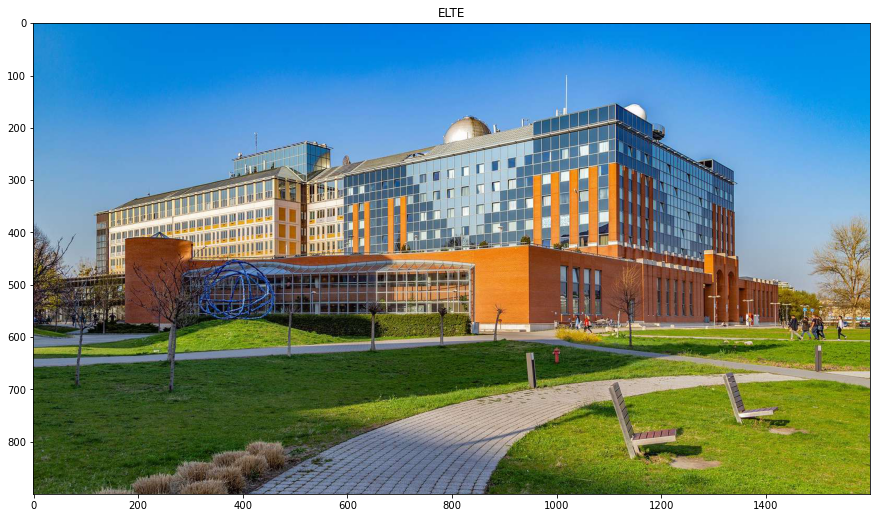

(900, 1600, 3)


In [11]:
image = np.array(Image.open("img/elte-ttk-vezetes.jpg"))
fig = plt.figure(figsize=(15, 10))
imgplot = plt.imshow(image)
plt.title("ELTE")
plt.show()
print(image.shape)

In [12]:
def svd_numpy(component):
    # Perform full SVD
    u, s, v = np.linalg.svd(component, full_matrices=True, compute_uv=True, hermitian=False)
    return (u, s, v)

In [13]:
from scipy.sparse.linalg import svds
def svd_scipy(component, k=0):    
    # Perform SVD
    if k == 0:
        k = min(component.shape)-1
    u, s, v = svds(component, k)
    return (u, s, v)

In [14]:
def reconstruct(u, s, v, k):
    # Take the first k columns of U.
    u_k = u[:, :k]
    # Take the first k rows of V.
    v_k = v[:k, :]
    # Take the first k singular values and construct the sigma diagonal matrix
    s_k = np.diag(s[:k])
    # Reconstruct the full matrices from the components.
    m_k = u_k @ s_k @ v_k
    return m_k

In [15]:
def recreate_img(full_svd_results, k, plot=True):
    reduced_matrix = [reconstruct(u, s, v, k) for u, s, v in full_svd_results.values()]
    reduced_img = np.zeros(image.shape)

    reduced_img[:, :, 0] = reduced_matrix[0]
    reduced_img[:, :, 1] = reduced_matrix[1]
    reduced_img[:, :, 2] = reduced_matrix[2]

    reduced_img = reduced_img.astype(int)
    if plot:
        fig = plt.figure(figsize=(15, 10))
        plt.imshow(reduced_img)
        plt.title(f'The reduced image for k={k}')
        plt.show()
    #return reduced_img

In [16]:
# Decompose it into the three color "channels"
# First "layer": red component, second layer: green component
# third "layer": blue component 
# All of them: integers in [0,255].
# Let us get them really separately: 
components = {'red': image[:, :, 0].astype('float64'),
              'green': image[:, :, 1].astype('float64'),
              'blue': image[:, :, 2].astype('float64')}

In [17]:
timed_results = {}

In [18]:
# Full SVD
start = timer()
full_svd_results = {key: svd_numpy(component) for key, component in components.items()}
end = timer()
timed_results['Full SVD:'] = end-start

In [19]:
k = 25

# Partial SVD
start = timer()
partial_svd_results = {key: svd_scipy(component, k) for key, component in components.items()}
end = timer()
timed_results[f'Partial SVD, k={k}'] = end-start

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


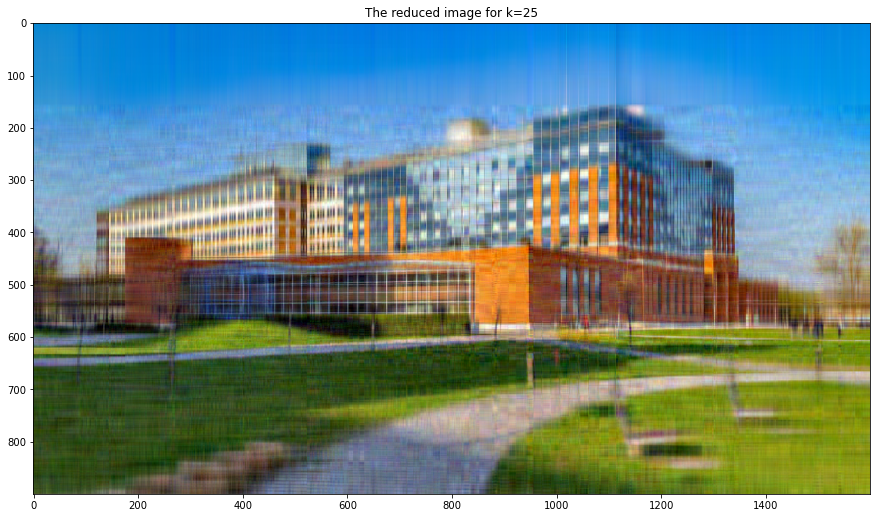

In [20]:
recreate_img(full_svd_results, k, plot=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


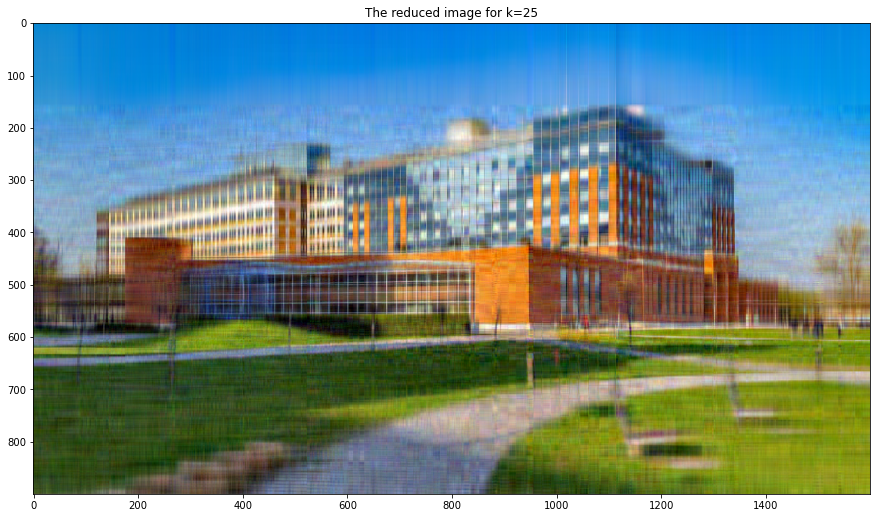

In [21]:
k = 25
recreate_img(partial_svd_results, k, plot=True)

In [22]:
print(timed_results)

{'Full SVD:': 1.8548269999999998, 'Partial SVD, k=25': 0.29282309999999967}
